***Step 1: Loading the Data***

In [2]:
from keras.datasets import imdb

In [5]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [6]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below
# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

<class 'list'>


In [7]:
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

9999

In [8]:
# Let's quickly decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
# Step 3: decode the review, mapping integer indices to words
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

***Step 2: Preparing the Data Vectorize input data***

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), 10000)
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1

    return results

In [13]:
# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [14]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
X_train.shape

(25000, 10000)

In [16]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

***Step 3: Model definition***

In [17]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


***Step 4: Compiling the model***

In [18]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

***Step 5: Setting up Validation***

In [19]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

***Step 6: Training our model***

In [22]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - binary_accuracy: 0.9996 - loss: 0.0090 - val_binary_accuracy: 0.8709 - val_loss: 0.5875
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - binary_accuracy: 0.9976 - loss: 0.0131 - val_binary_accuracy: 0.8691 - val_loss: 0.6074
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - binary_accuracy: 0.9999 - loss: 0.0065 - val_binary_accuracy: 0.8405 - val_loss: 0.8518
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - binary_accuracy: 0.9948 - loss: 0.0190 - val_binary_accuracy: 0.8693 - val_loss: 0.6477
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - binary_accuracy: 0.9982 - loss: 0.0091 - val_binary_accuracy: 0.8677 - val_loss: 0.6706
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 1.0000 - loss: 0.0040 - val_binary_accuracy: 0.8667 - val_loss: 0.6972
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9983 - loss: 0.0104 - val_binary_accuracy: 0.8675 - val_loss: 0.7053
Epoch 8/20
30

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

***Step 7: Matplotlib to plot Training and validation losses and Training and Validation Accuracy side by side***

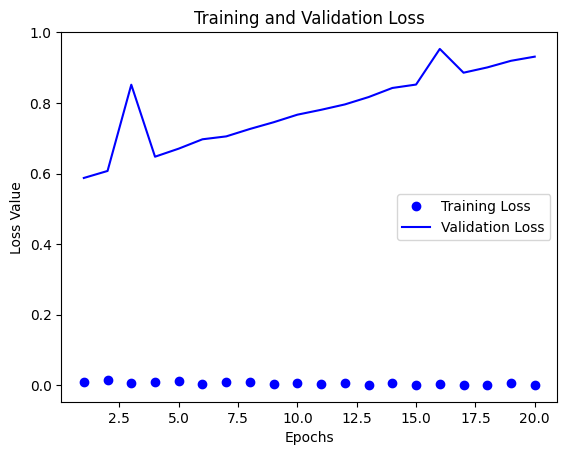

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

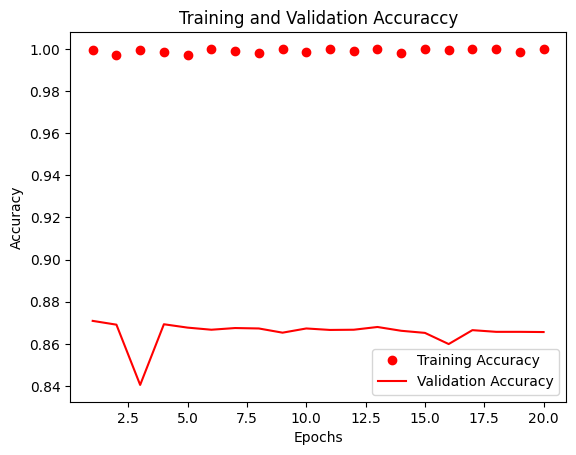

In [27]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

***Step 8: Retraining our model***

In [28]:
model.fit(partial_X_train,
                partial_y_train,
                epochs=3,
                batch_size=512,
                validation_data=(X_val, y_val))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - binary_accuracy: 1.0000 - loss: 7.0858e-04 - val_binary_accuracy: 0.8664 - val_loss: 0.9545
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9985 - loss: 0.0056 - val_binary_accuracy: 0.8660 - val_loss: 0.9674
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - binary_accuracy: 1.0000 - loss: 5.2841e-04 - val_binary_accuracy: 0.8664 - val_loss: 0.9769


***Step 9: Model Evaluation***

In [29]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

result

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.00097088],
       [1.        ],
       [0.5796412 ],
       ...,
       [0.00001021],
       [0.00082148],
       [0.99842614]], dtype=float32)

In [30]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
 y_pred[i] = 1 if score > 0.5 else 0

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
# Error
mae

0.14608